# Dask - Introduction

Dask is a parallel computing library that scales the existing Python ecosystem.

In [1]:
print('Hello World!')

Hello World!


### Simulate work

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y 

In [3]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

print(z)

5
CPU times: user 0 ns, sys: 1.58 ms, total: 1.58 ms
Wall time: 3 s


`%%time` is a Built-in magic commands to time the cell execution


### Parallelize with the `dask.delayed` decorator

In [4]:
from dask import delayed

In [5]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

print(z)

Delayed('add-00fdaf40-03b5-4039-9118-8a0baca60e8c')
CPU times: user 1.11 ms, sys: 843 µs, total: 1.95 ms
Wall time: 1.38 ms


Lazy functions: This ran immediately, since nothing happened besides buidling the Task Graph.

To get the result from the delayed object `z`, we have to `compute` it.

In [6]:
%%time

z.compute()

CPU times: user 18.7 ms, sys: 8.32 ms, total: 27 ms
Wall time: 2.02 s


5

### What happened? - The task graph

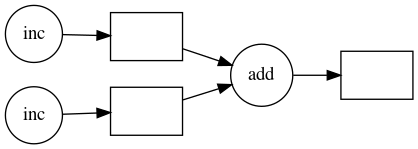

In [7]:
z.visualize(rankdir='LR')

### Exercise: parallelizing a for-loop

In [8]:
input = [1, 2, 3, 4, 5]

In [9]:
%%time

results = []
for x in input:
    y = inc(x)
    results.append(y)
    
total = sum(results)

print(total)

20
CPU times: user 9.83 ms, sys: 2.65 ms, total: 12.5 ms
Wall time: 5 s


### Solution: parallelizing a for-loop
We decorate naively.

In [10]:
%%time

results = []
for x in input:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

print('Before compute:',total)
print('After compute:',total.compute())

Before compute: Delayed('sum-fd4abd30-cf39-4636-b58f-3098e675c76b')
After compute: 20
CPU times: user 9.07 ms, sys: 1.73 ms, total: 10.8 ms
Wall time: 1.01 s


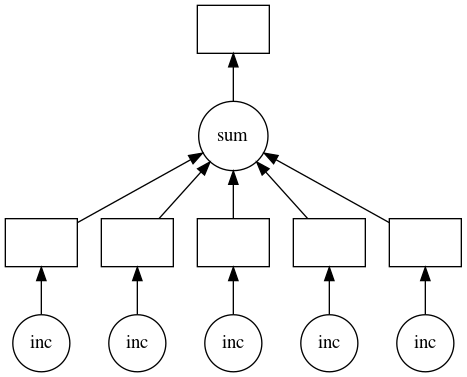

In [11]:
total.visualize()